In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the data
emotion2_df = pd.read_csv('..\\..\\data\\features\\eeg_1738123456789_emotion2_preprocessed_emotional-features.csv')
emotion1_df = pd.read_csv('..\\..\\data\\features\\eeg_1738987654321_emotion1_preprocessed_emotional-features.csv')

emotion2_df['emotion'] = 'emotion2'
emotion1_df['emotion'] = 'emotion1'
combined_df = pd.concat([emotion2_df, emotion1_df]).set_index("epoch")

# Plotting
plt.figure(figsize=(12, 6))
plot_df = combined_df.melt(
    id_vars='emotion', 
    value_vars=combined_df.columns[:-1], 
    var_name="parameter", 
    value_name="value"
)

# T-test to find significant differences
features = combined_df.columns[:-1]  # Exclude the 'emotion' column
significant_features = []

for feature in features:
    stat, p_value = ttest_ind(emotion2_df[feature], emotion1_df[feature])
    if p_value < 0.05:
        significant_features.append(feature)
        print(f"Feature: {feature}, p-value: {p_value}")

print("\nSignificant features that differ between anger and joy:")
print(significant_features)

Feature: mobility, p-value: 0.011858285873456956
Feature: zero_crossings, p-value: 0.0001708238476298184
Feature: gamma_power, p-value: 3.235201811659469e-06

Significant features that differ between anger and joy:
['mobility', 'zero_crossings', 'gamma_power']


<Figure size 1200x600 with 0 Axes>

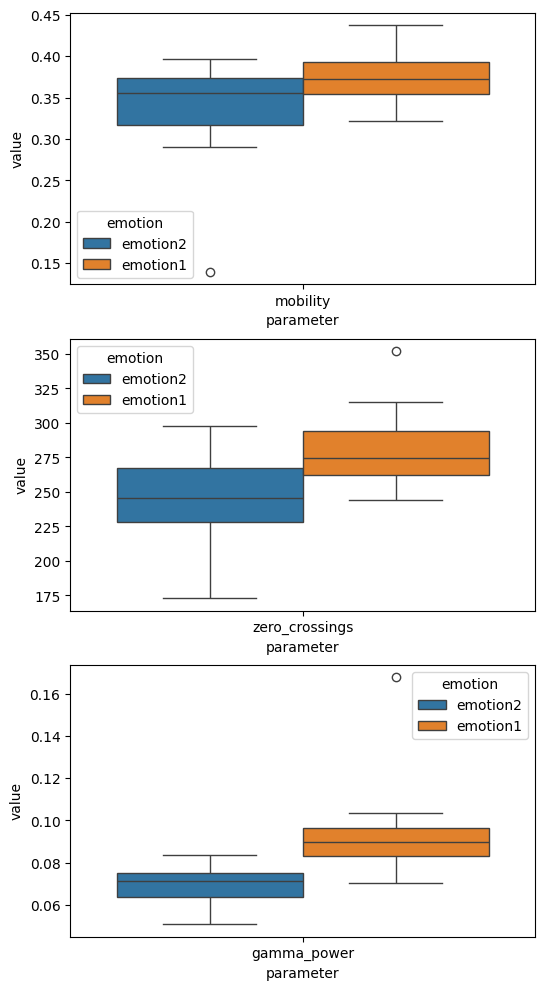

In [2]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(6,12), nrows=3, ncols=1)
sns.boxplot(data=plot_df.loc[plot_df.parameter=="mobility"], x="parameter", y="value", hue="emotion", ax=ax1)
sns.boxplot(data=plot_df.loc[plot_df.parameter=="zero_crossings"], x="parameter", y="value", hue="emotion", ax=ax2)
sns.boxplot(data=plot_df.loc[plot_df.parameter=="gamma_power"], x="parameter", y="value", hue="emotion", ax=ax3)
plt.show()